<a href="https://colab.research.google.com/github/Anjanachenchani/Analog-clock/blob/main/exp_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster Labels: [0 1 0 2 1 2 0 0 2]
Centroids:
 [[1.25       1.        ]
 [2.5        4.        ]
 [3.66666667 1.        ]]


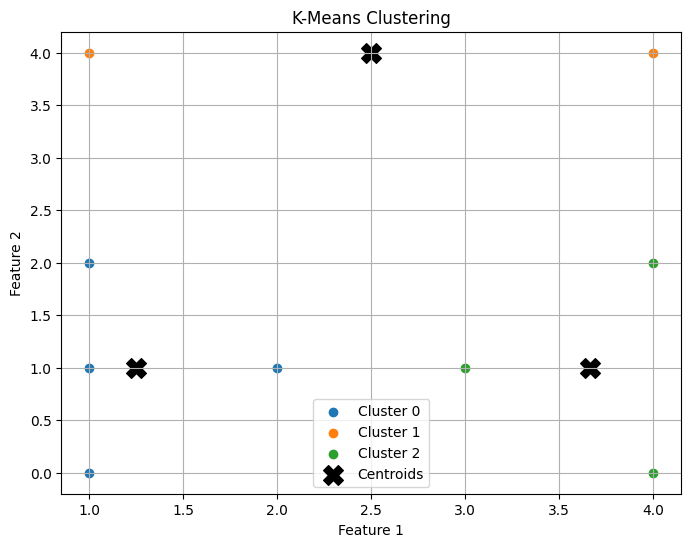

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the dataset
    np.random.seed(42)  # For reproducibility
    initial_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[initial_indices]

    for _ in range(max_iters):
        # Step 2: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 3: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Function to plot the clusters
def plot_clusters(X, labels, centroids):
    plt.figure(figsize=(8, 6))
    for i in range(np.max(labels) + 1):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Sample data: 2D points
    data = np.array([
        [1, 2], [1, 4], [1, 0],
        [4, 2], [4, 4], [4, 0],
        [1, 1], [2, 1], [3, 1]
    ])

    k = 3  # Number of clusters
    labels, centroids = kmeans(data, k)

    print("Cluster Labels:", labels)
    print("Centroids:\n", centroids)

    # Plot the clusters
    plot_clusters(data, labels, centroids)
